# Simplest use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### Imports

In [1]:
from dolphin.processor import Processor
from dolphin.analysis.output import Output

### create a `Processor` instance and point to the IO directory

In [2]:
processor = Processor("../io_directory_example/")

### Run a model by calling the  `swim()` method

In [ ]:
processor.swim(lens_name="lens_system2", model_id="example", log=False)

Optimizing model for lens_system2 with recipe: galaxy-galaxy.
Computing the PSO ...


  0%|          | 0/50 [00:00<?, ?it/s]/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:96: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  x = scipy.optimize.fsolve(
/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:96: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  x = scipy.optimize.fsolve(
100%|██████████| 50/50 [01:01<00:00,  1.24s/it]


Max iteration reached! Stopping.
-509.67969162200046 reduced X^2 of best position
-100152.05940372309 log likelihood
393 effective number of data points
[{'theta_E': 1.0474144868211768, 'gamma': 2.0, 'e1': 0.019199015121312987, 'e2': -1.5151354801238045e-17, 'center_x': -0.08850767762550096, 'center_y': -6.099328341891205e-17}, {'gamma_ext': 0.05, 'psi_ext': 0.0, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'n_max': 4, 'beta': 0.1, 'center_x': -0.09059571451878333, 'center_y': -9.077696643949989e-17}] source result
[{'amp': 1, 'R_sersic': 0.2, 'n_sersic': 4.0, 'e1': 0.0, 'e2': 0.0, 'center_x': 0.0, 'center_y': 0.0}] lens light result
[{'ra_image': array([1., 0., 1., 0.]), 'dec_image': array([ 0.,  1.,  0., -1.]), 'point_amp': array([1., 1., 1., 1.])}] point source result
[] tracer source result
{} special param result
61.77426099777222 time used for  PSO
Computing the PSO ...


100%|██████████| 50/50 [01:15<00:00,  1.52s/it]


Max iteration reached! Stopping.
-22.761255737191043 reduced X^2 of best position
-163562.38372745484 log likelihood
14372 effective number of data points
[{'theta_E': 1.048840603634317, 'gamma': 2.0, 'e1': 0.015617660338770855, 'e2': 1.3149885431691863e-15, 'center_x': -0.09072295892593256, 'center_y': 3.931534579173558e-16}, {'gamma_ext': 0.05, 'psi_ext': -5.1813652319603035e-17, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'n_max': 4, 'beta': 0.1, 'center_x': -0.09330379901695449, 'center_y': 5.476589229712795e-16}] source result
[{'amp': 1, 'R_sersic': 0.2, 'n_sersic': 4.0, 'e1': 0.0, 'e2': 0.0, 'center_x': 0.0, 'center_y': 0.0}] lens light result
[{'ra_image': array([1., 0., 1., 0.]), 'dec_image': array([ 0.,  1.,  0., -1.]), 'point_amp': array([1., 1., 1., 1.])}] point source result
[] tracer source result
{} special param result
75.76817202568054 time used for  PSO
Computing the PSO ...


 52%|█████▏    | 26/50 [00:35<00:34,  1.44s/it]Traceback (most recent call last):
  File "/Users/ajshajib/software_development/lenstronomy/lenstronomy/Sampling/Samplers/pso.py", line 472, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ajshajib/software_development/lenstronomy/lenstronomy/Sampling/likelihood.py", line 352, in logL
    return self.log_likelihood(kwargs_return, verbose=verbose)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ajshajib/software_development/lenstronomy/lenstronomy/Sampling/likelihood.py", line 397, in log_likelihood
    logL_image, param = self.image_likelihood.logL(**kwargs_return)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ajshajib/software_development/lenstronomy/lenstronomy/Sampling/Likelihoods/image_likelihood.py", line 74, in logL
    logL, param = self.imSim.likelihood_data_given_model(
                  ^^^

PSO: Exception while calling your likelihood function:
  params: [1.0002220640228756, -0.00020550123045766356, 1.0006639105510762, -0.0005375598118381383, -0.0016029943024569355, 0.997810885274088, -9.107430673360267e-05, -0.9993733889847239]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

## Let's check the output

In [ ]:
output = Output("../io_directory_example/")

-1.0548847349795192 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0548847349795198


/Users/ajshajib/software_development/lenstronomy/lenstronomy/Plots/model_band_plot.py:160: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),


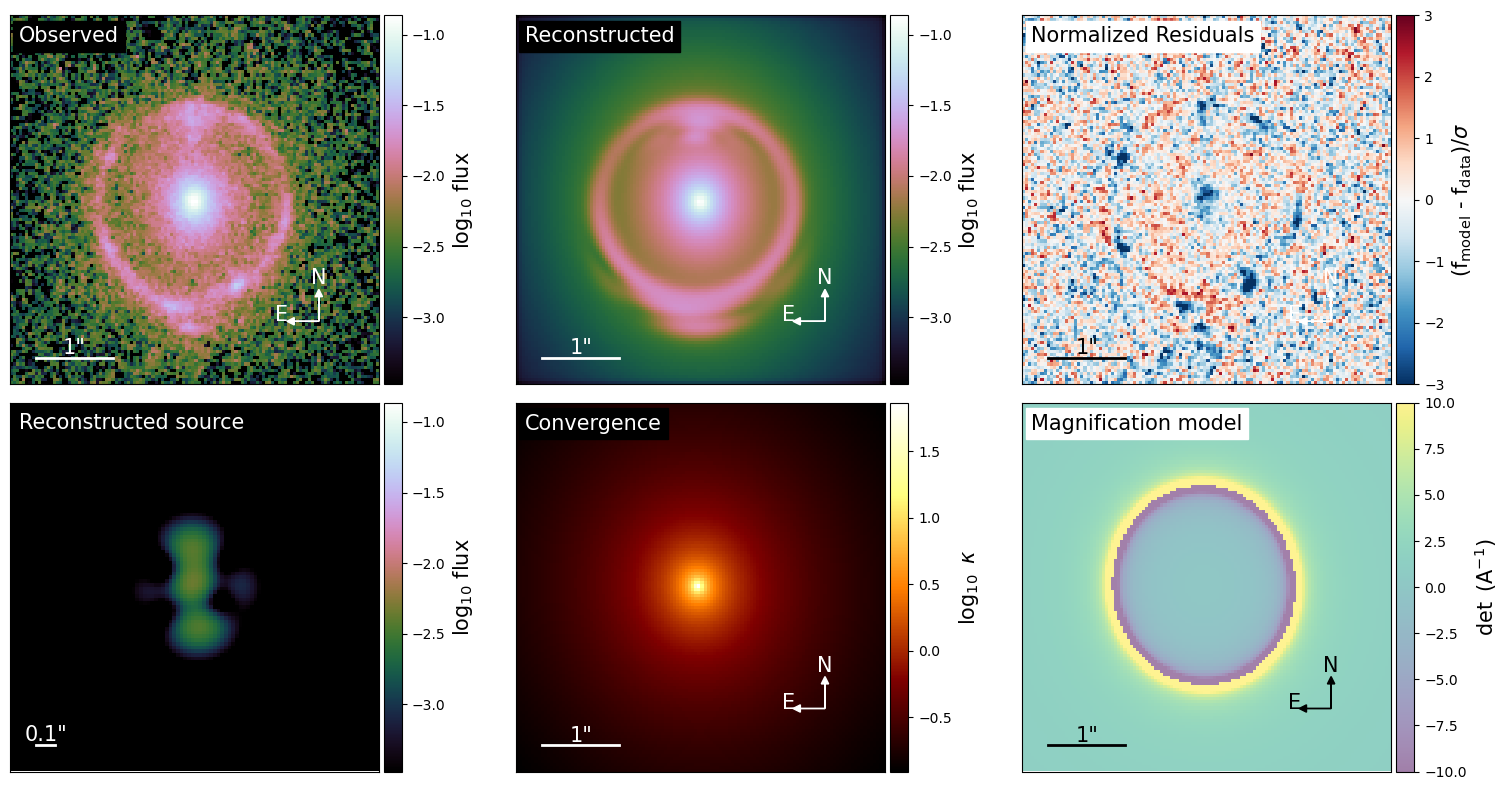

In [ ]:
fig = output.plot_model_overview(lens_name="lens_system2", model_id="example")

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [ ]:
output.load_output(lens_name="lens_system2", model_id="example")

output.kwargs_result

{'kwargs_lens': [{'theta_E': 1.2394958243675473,
   'gamma': 2.1807962240145295,
   'e1': -0.05266512885525291,
   'e2': 0.011480804088868746,
   'center_x': 0.054414803730345095,
   'center_y': -0.0021226872482192167},
  {'gamma_ext': 0.002181951918667522,
   'psi_ext': 0.07463015029204238,
   'ra_0': 0,
   'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'n_max': 4,
   'beta': 0.11019055597447865,
   'center_x': 0.06653099661656038,
   'center_y': -0.29671443977366746}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 2.7949090301097956,
   'n_sersic': 4.0,
   'e1': -0.0908510001467005,
   'e2': 0.007219718280187696,
   'center_x': 0.02288444778837745,
   'center_y': -0.049152964205808794}],
 'kwargs_ps': [],
 'kwargs_special': {},
 'kwargs_extinction': [],
 'kwargs_tracer_source': []}

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [ ]:
output.model_settings

{'system_name': 'lens_system2',
 'band': ['F390W'],
 'pixel_size': 0.04,
 'model': {'lens': ['EPL', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SHAPELETS']},
 'lens_option': {'centroid_init': [0.04, -0.04]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [4]},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 20, 'num_iteration': 50},
  'sampling': True,
  'sampler': 'emcee',
  'sampler_settings': {'n_burn': 0,
   'n_run': 100,
   'walkerRatio': 2,
   'threadCount': 1,
   'init_samples': None}},
 'numeric_option': {'supersampling_factor': [2]}}